In [38]:
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy as tw
import json
import pandas as pd
import csv
from collections import defaultdict
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import datetime as dt
from datetime import datetime
#import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# TWİTTER VERİ ÇEKME

In [4]:
#import files and give access to tokens and keys
access_token       ="XXXXXX"
access_token_secret="XXXXXX"
consumer_key       ="XXXXXX"
consumer_secret    ="XXXXXX"


auth= tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [5]:
geo='51.5,-0.1,150km'

text_query = "Dogecoin" + "-filter:retweets" 
since_date = '2021-01-24'
until_date = '2021-01-31'
max_tweets = 34000


tweets = tweepy.Cursor(api.search,q=text_query , lang="en", geocode=geo , since=since_date, until = until_date).items(max_tweets)

In [ ]:
users_text = [[tweet.user.screen_name, tweet.created_at, tweet.user.location, tweet.text ] for tweet in tweets]

In [ ]:
tweet_df = pd.DataFrame(data=users_text,
                    columns=["User","Time","Location","Tweet"])

In [53]:
tweet_df.to_csv('doge_lnd_150km.csv',index=False)

In [ ]:
# Analysis DOGECOİN Data

In [166]:
doge_df         = pd.read_csv("doge_data.csv", sep="|", header=None)
doge_df['Time'] = pd.to_datetime(doge_df[0],unit='s')

doge_london = pd.read_csv("doge_london.csv")
doge_NY     = pd.read_csv("doge_ny.csv")

In [167]:
doge_df.set_index(pd.DatetimeIndex(doge_df['Time']), inplace=True) 
doge_df.drop(["Time"],axis=1,inplace=True)

doge_london.set_index(pd.DatetimeIndex(doge_london['Time']), inplace=True) 
doge_NY.set_index(pd.DatetimeIndex(doge_NY['Time']), inplace=True) 

doge_london.drop(["Time"],axis=1,inplace=True)
doge_NY.drop(["Time"],axis=1,inplace=True)

doge_NY     = doge_NY.iloc[::-1]
doge_london = doge_london.iloc[::-1]

In [168]:
doge_price  = doge_df.loc["2021-01-22" : "2021-02-04"]
doge_price = doge_price.rename(columns={1: 'Open', 2: 'Hight' , 3:'Low', 4:'Close'})
doge_price.drop([0,5,6,7,8,9],axis=1,inplace=True)

In [169]:
doge_NY["hour"]  =  doge_NY.index.hour 
doge_NY["day"]   =  doge_NY.index.day
doge_NY["month"] =  doge_NY.index.month
doge_NY["year"]  =  doge_NY.index.year

In [170]:
doge_NY.head()

,User,Location,Tweet,hour,day,month,year
Time,,,,,,,
2021-01-26 04:34:51,MarcoPCamara,"Sayreville, NJ",Join Robinhood with my link and we'll both get...,4,26,1,2021
2021-01-26 21:14:10,rolo65,"Georgia, USA",@elonmusk #dogecoin tweet it. Do it,21,26,1,2021
2021-01-26 22:53:13,Nick_Smith15,South Amboy,@elonmusk how do you feel about #dogecoin,22,26,1,2021
2021-01-26 23:03:05,SamirKasyap,NaN,@elonmusk Hi @elonmusk please tweet Dogecoin,23,26,1,2021
2021-01-27 15:02:22,NylaMonetttt,"Georgia, USA",I’m letting y’all know now... invest in Dogeco...,15,27,1,2021


In [ ]:
doge_NY["date"]= pd.to_datetime(doge_NY[['year', 'month', 'day', 'hour']])

In [171]:
doge_NY_tweet = doge_NY


In [8]:
doge_NY.drop(["Location","Tweet","hour","day","month","year"],axis=1,inplace=True)

In [10]:
doge_NY = doge_NY.reset_index()

In [11]:
doge_NY_group = doge_NY.groupby(['date']).agg('count')

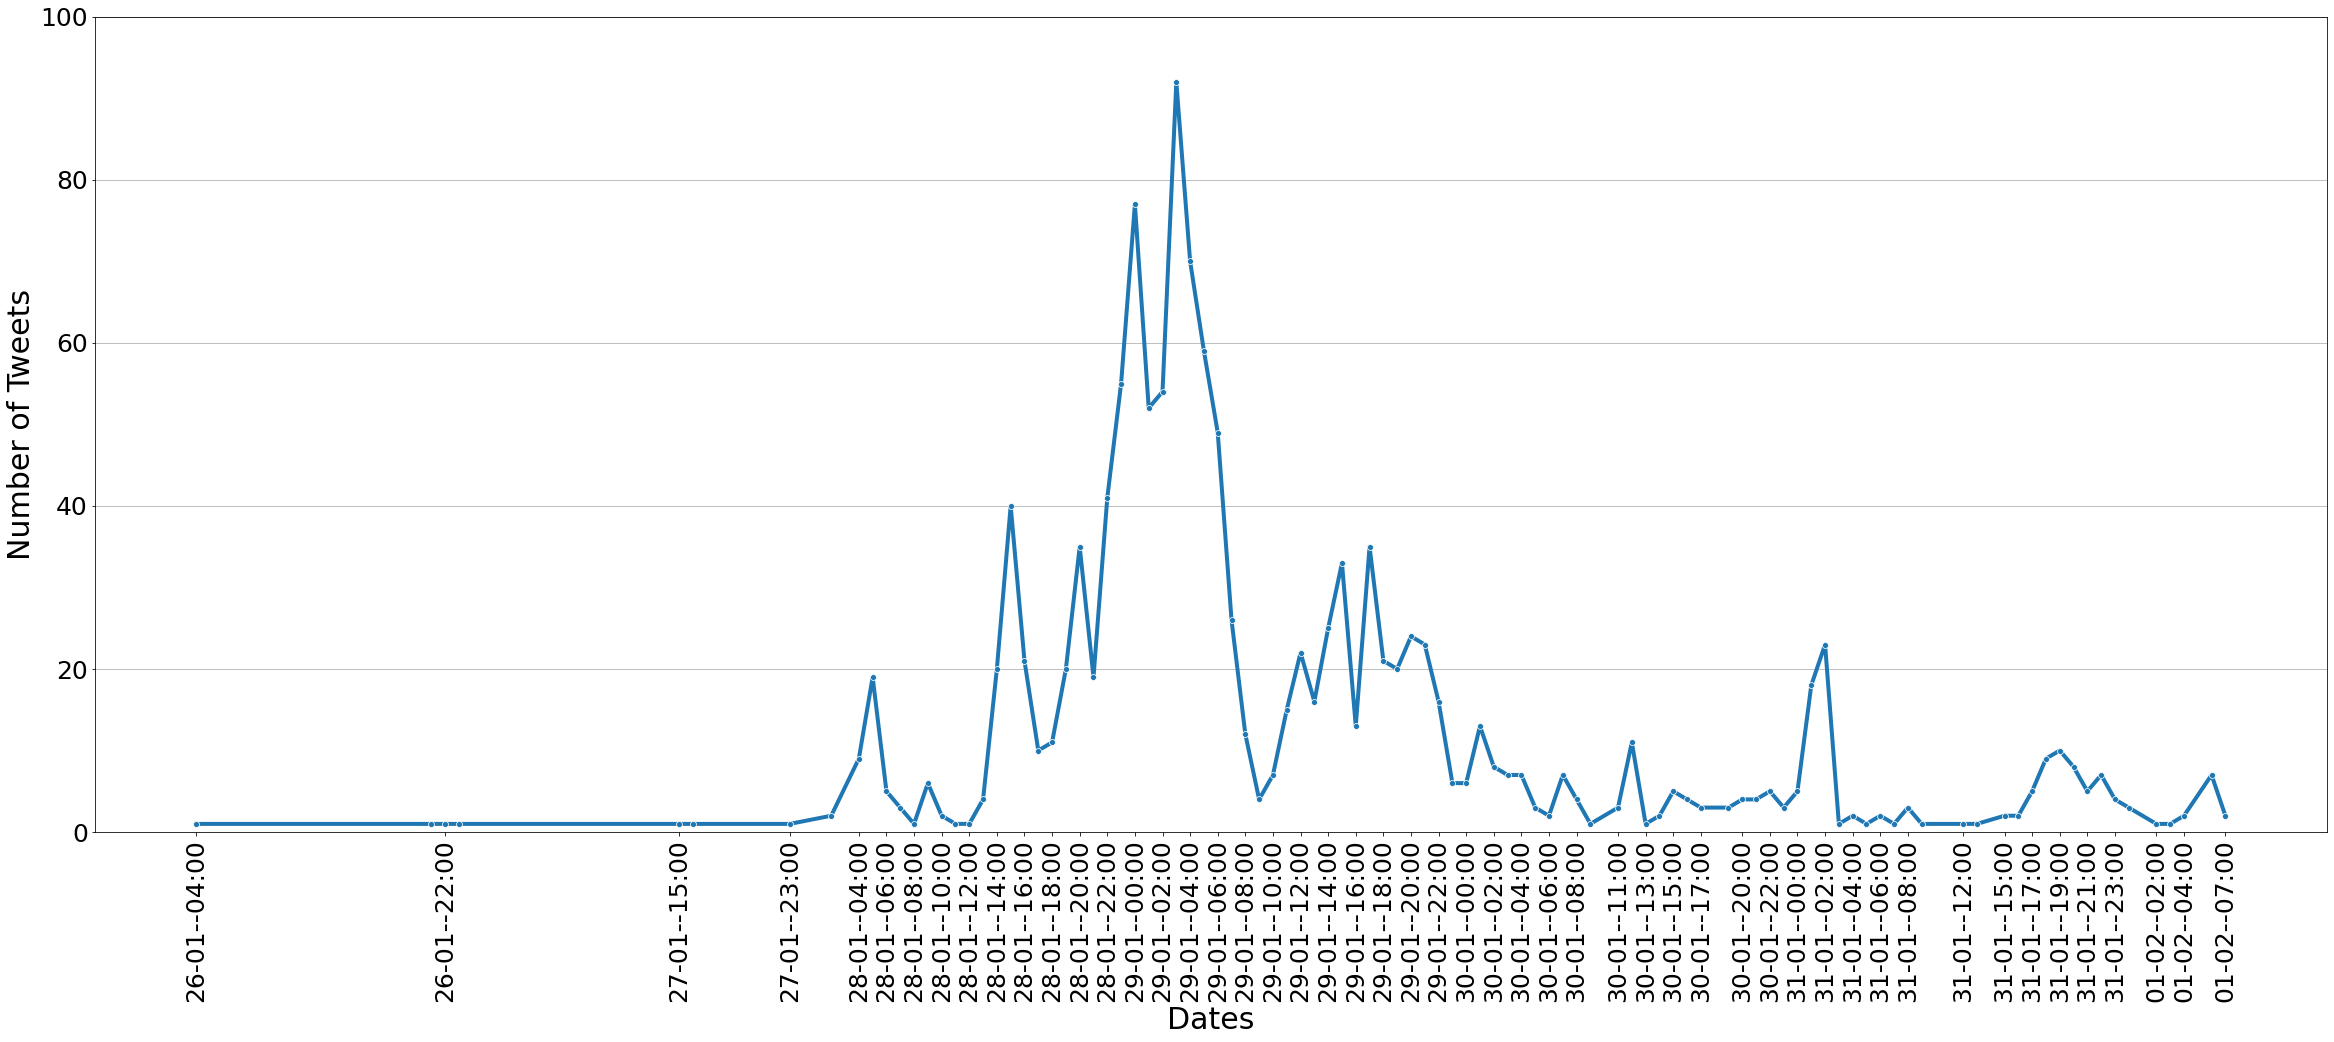

In [163]:
plt.subplots(figsize=(40,15))
plt.xticks(rotation=90)
line = sns.lineplot(data=doge_NY_group, x=doge_NY_group.index, y="User", marker="o", linewidth=4.0)
line.set(xticks=doge_NY_group.index.values)
plt.xticks(size = 25)
plt.yticks(size = 25)
line.set_xticks(line.get_xticks()[::2])
line.set_ylim([0,100])
plt.xlabel('Dates', size = 30)
plt.ylabel('Number of Tweets', size = 30)
plt.grid(axis='y', linestyle='-')
line.xaxis.set_major_formatter(dates.DateFormatter("%d-%m--%H:%M"))

In [13]:
#London Data

In [14]:
doge_london["hour"]  =  doge_london.index.hour 
doge_london["day"]   =  doge_london.index.day
doge_london["month"] = doge_london.index.month
doge_london["year"]  = doge_london.index.year

In [15]:
doge_london["date"]= pd.to_datetime(doge_london[['year', 'month', 'day', 'hour']])

In [16]:
doge_london.head()

,User,Location,Tweet,hour,day,month,year,date
Time,,,,,,,,
2021-01-24 13:04:18,CryptoBitSwag,London,Love #Dogecoin #dogearmy https://t.co/78RW6woYF5,13,24,1,2021,2021-01-24 13:00:00
2021-01-24 15:31:38,MohistMan,"Cambridge, UK",@CryptoEmme Dogecoin rose more than BTC in one...,15,24,1,2021,2021-01-24 15:00:00
2021-01-24 15:42:30,MohistMan,"Cambridge, UK",@DoveyWan @CL207 Dogecoin becomes the biggest ...,15,24,1,2021,2021-01-24 15:00:00
2021-01-24 15:57:32,MohistMan,"Cambridge, UK","@Reuters Dogs are man's best friend, and dogec...",15,24,1,2021,2021-01-24 15:00:00
2021-01-24 16:00:43,MohistMan,"Cambridge, UK",@fundstrat Short positions are the fuel of ris...,16,24,1,2021,2021-01-24 16:00:00


In [17]:
doge_london.drop(["Location","Tweet","hour","day","month","year"],axis=1,inplace=True)

In [18]:
doge_london = doge_london.reset_index()

In [19]:
doge_london_group = doge_london.groupby(['date']).agg('count')

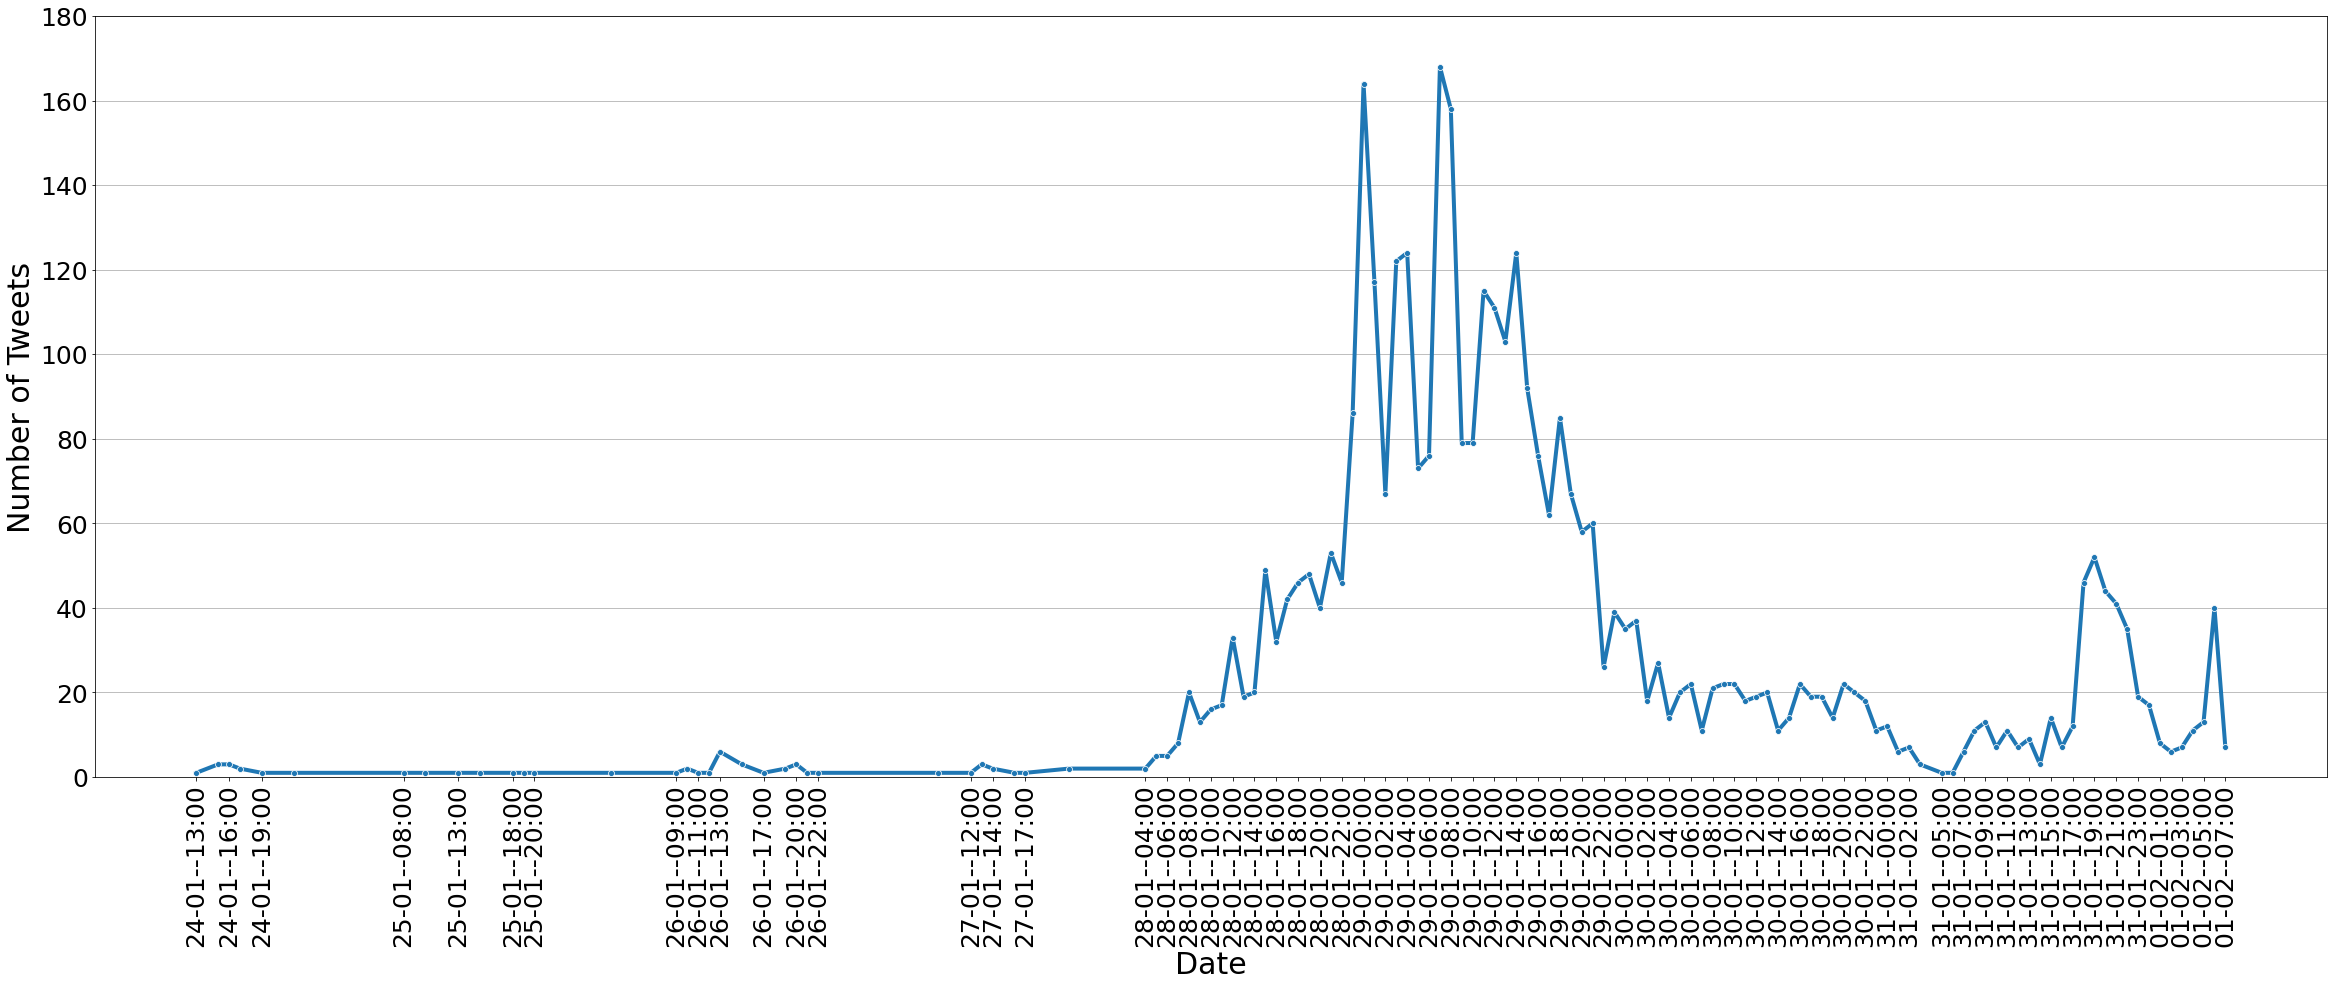

In [165]:
plt.subplots(figsize=(40,14))
plt.xticks(rotation=90)
line = sns.lineplot(data=doge_london_group, x=doge_london_group.index, y="User", marker="o", linewidth=4.0)
line.set(xticks=doge_london_group.index.values)
plt.xticks(size = 25)
plt.yticks(size = 25)
line.set_xticks(line.get_xticks()[::2])
line.set_ylim([0,180])
plt.xlabel('Date', size = 30)
plt.ylabel('Number of Tweets', size = 30)
plt.grid(axis='y', linestyle='-')
line.xaxis.set_major_formatter(dates.DateFormatter("%d-%m--%H:%M"))

In [22]:
# NY Common Words

In [39]:
# Drop @
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

doge_NY_tweet['Tweet'] = np.vectorize(remove_pattern)(doge_NY_tweet['Tweet'] ,  "@[\w]*")

In [42]:
# @ remove_URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    
    return url.sub(r'',text)

doge_NY_tweet['Tweet']=doge_NY_tweet['Tweet'].apply(lambda x : remove_URL(x))

In [44]:
doge_NY_tweet['Tweet']=doge_NY_tweet['Tweet'].str.replace("[^A-Za-z]"," ")
doge_NY_tweet['Tweet']= doge_NY_tweet['Tweet'].str.replace(r"\b[a-zA-Z]\b", "")

In [45]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
doge_NY_tweet['Tweet']= doge_NY_tweet['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /home/hakan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [154]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in sw]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 20

# Unigrams
tweet_unigrams = defaultdict(int)


for tweet in doge_NY_tweet['Tweet']:
    for word in generate_ngrams(tweet):
        tweet_unigrams[word] += 1
        
df_tweet_unigrams = pd.DataFrame(sorted(tweet_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
tweet_bigrams = defaultdict(int)


for tweet in doge_NY_tweet['Tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        tweet_bigrams[word] += 1
        
        
df_tweet_bigrams = pd.DataFrame(sorted(tweet_bigrams.items(), key=lambda x: x[1])[::-1])


# Trigrams
tweet_trigrams = defaultdict(int)

for tweet in doge_NY_tweet['Tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        tweet_trigrams[word] += 1
        
df_tweet_trigrams = pd.DataFrame(sorted(tweet_trigrams.items(), key=lambda x: x[1])[::-1])

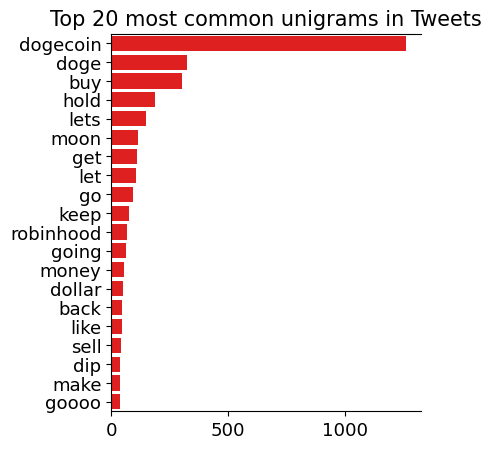

In [156]:
fig, axes = plt.subplots(ncols=1, figsize=(4, 5), dpi=100)
#plt.tight_layout()

sns.barplot(y=df_tweet_unigrams[0].values[:N], x=df_tweet_unigrams[1].values[:N], ax=axes, color='red')

axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)

axes.set_title(f'Top {N} most common unigrams in Tweets', fontsize=15)


plt.show()

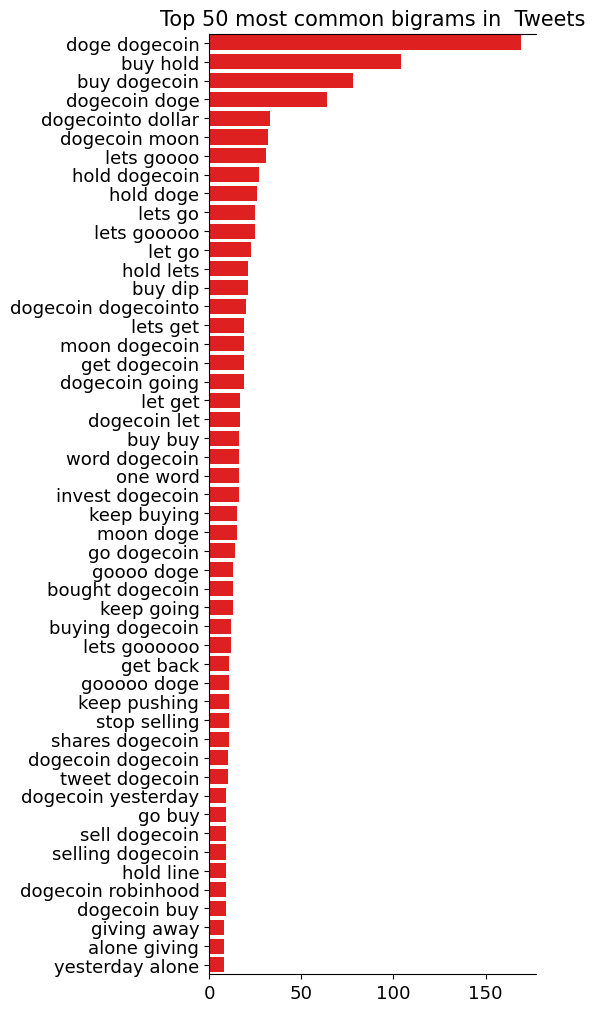

In [86]:
fig, axes = plt.subplots(ncols=1, figsize=(4, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_tweet_bigrams[0].values[:N], x=df_tweet_bigrams[1].values[:N], ax=axes, color='red')


axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)

axes.set_title(f'Top {N} most common bigrams in  Tweets', fontsize=15)


plt.show()

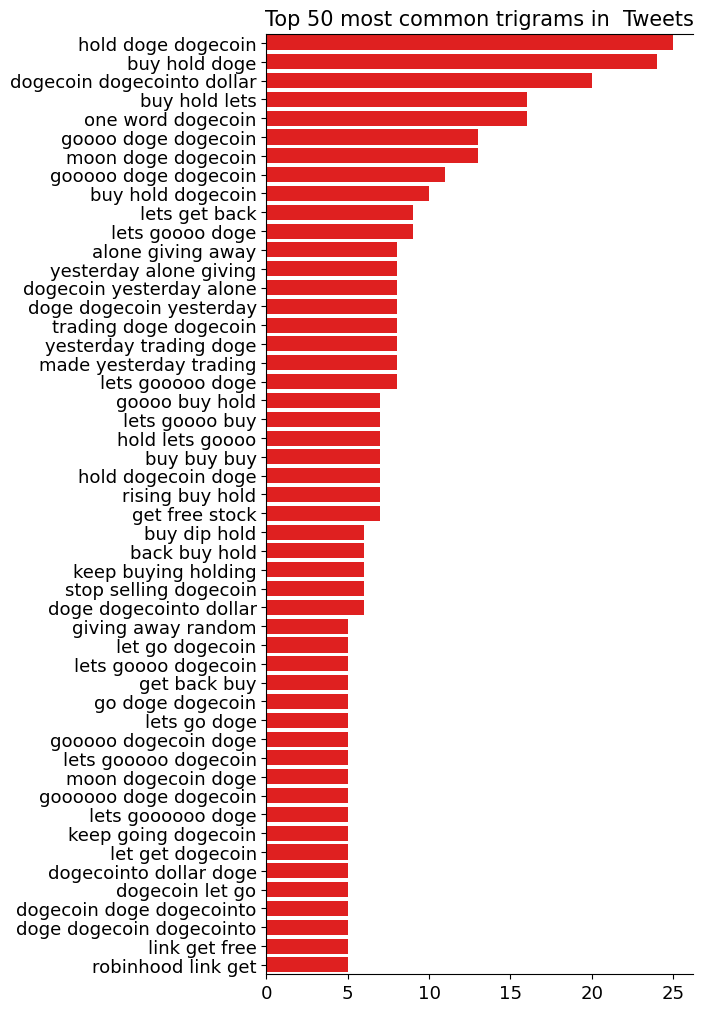

In [84]:
fig, axes = plt.subplots(ncols=1, figsize=(5, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_tweet_trigrams[0].values[:N], x=df_tweet_trigrams[1].values[:N], ax=axes, color='red')


axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)

axes.set_title(f'Top {N} most common trigrams in  Tweets', fontsize=15)


plt.show()

In [129]:
doge_NY_tweet.head()

,User,Tweet,Tweet-moon
Time,,,
2021-01-26 04:34:51,MarcoPCamara,Join Robinhood link get free stock xrp xrpcomm...,get
2021-01-26 21:14:10,rolo65,dogecoin tweet Do,
2021-01-26 22:53:13,Nick_Smith15,feel dogecoin,
2021-01-26 23:03:05,SamirKasyap,Hi please tweet Dogecoin,
2021-01-27 15:02:22,NylaMonetttt,letting know invest Dogecoin left behind runs ...,


In [140]:
moon = ["moon","buy","hold","lets","get","keep","lets"]
doge_NY_tweet['Tweet-moon']= doge_NY_tweet['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x in moon))

In [141]:
doge_NY_tweet["Tweet-moon"].loc[doge_NY_tweet["Tweet-moon"].isin(moon)].value_counts()

buy     90
get     55
moon    44
hold    29
keep    13
lets     6
Name: Tweet-moon, dtype: int64

In [142]:
doge_NY_spec_tweet = doge_NY_tweet[doge_NY_tweet['Tweet-moon'].str.contains("moon|buy|hold|lets|get|keep|lets")] 
doge_NY_spec_tweet.drop(["Tweet","User"],axis=1,inplace=True)

/home/hakan/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [143]:
doge_NY_spec_tweet.head()

,Tweet-moon
Time,
2021-01-26 04:34:51,get
2021-01-27 16:23:26,buy get
2021-01-27 23:43:49,moon
2021-01-28 04:35:01,buy
2021-01-28 04:55:09,keep


In [144]:
doge_NY_spec_tweet["hour"] =  doge_NY_spec_tweet.index.hour 
doge_NY_spec_tweet["day"]  =  doge_NY_spec_tweet.index.day
doge_NY_spec_tweet["month"]= doge_NY_spec_tweet.index.month
doge_NY_spec_tweet["year"] = doge_NY_spec_tweet.index.year

doge_NY_spec_tweet["date"]= pd.to_datetime(doge_NY_spec_tweet[['year', 'month', 'day', 'hour']])
doge_NY_spec_tweet        = doge_NY_spec_tweet.reset_index()
doge_NY_spec_tweet_group  = doge_NY_spec_tweet.groupby(['date']).agg('count')
doge_NY_spec_tweet_group.drop(['year', 'month', 'day', 'hour',"Tweet-moon"],axis=1,inplace=True)

<ipython-input-144-12973bd7b111>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_NY_spec_tweet["hour"] =  doge_NY_spec_tweet.index.hour
<ipython-input-144-12973bd7b111>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_NY_spec_tweet["day"] =  doge_NY_spec_tweet.index.day
<ipython-input-144-12973bd7b111>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

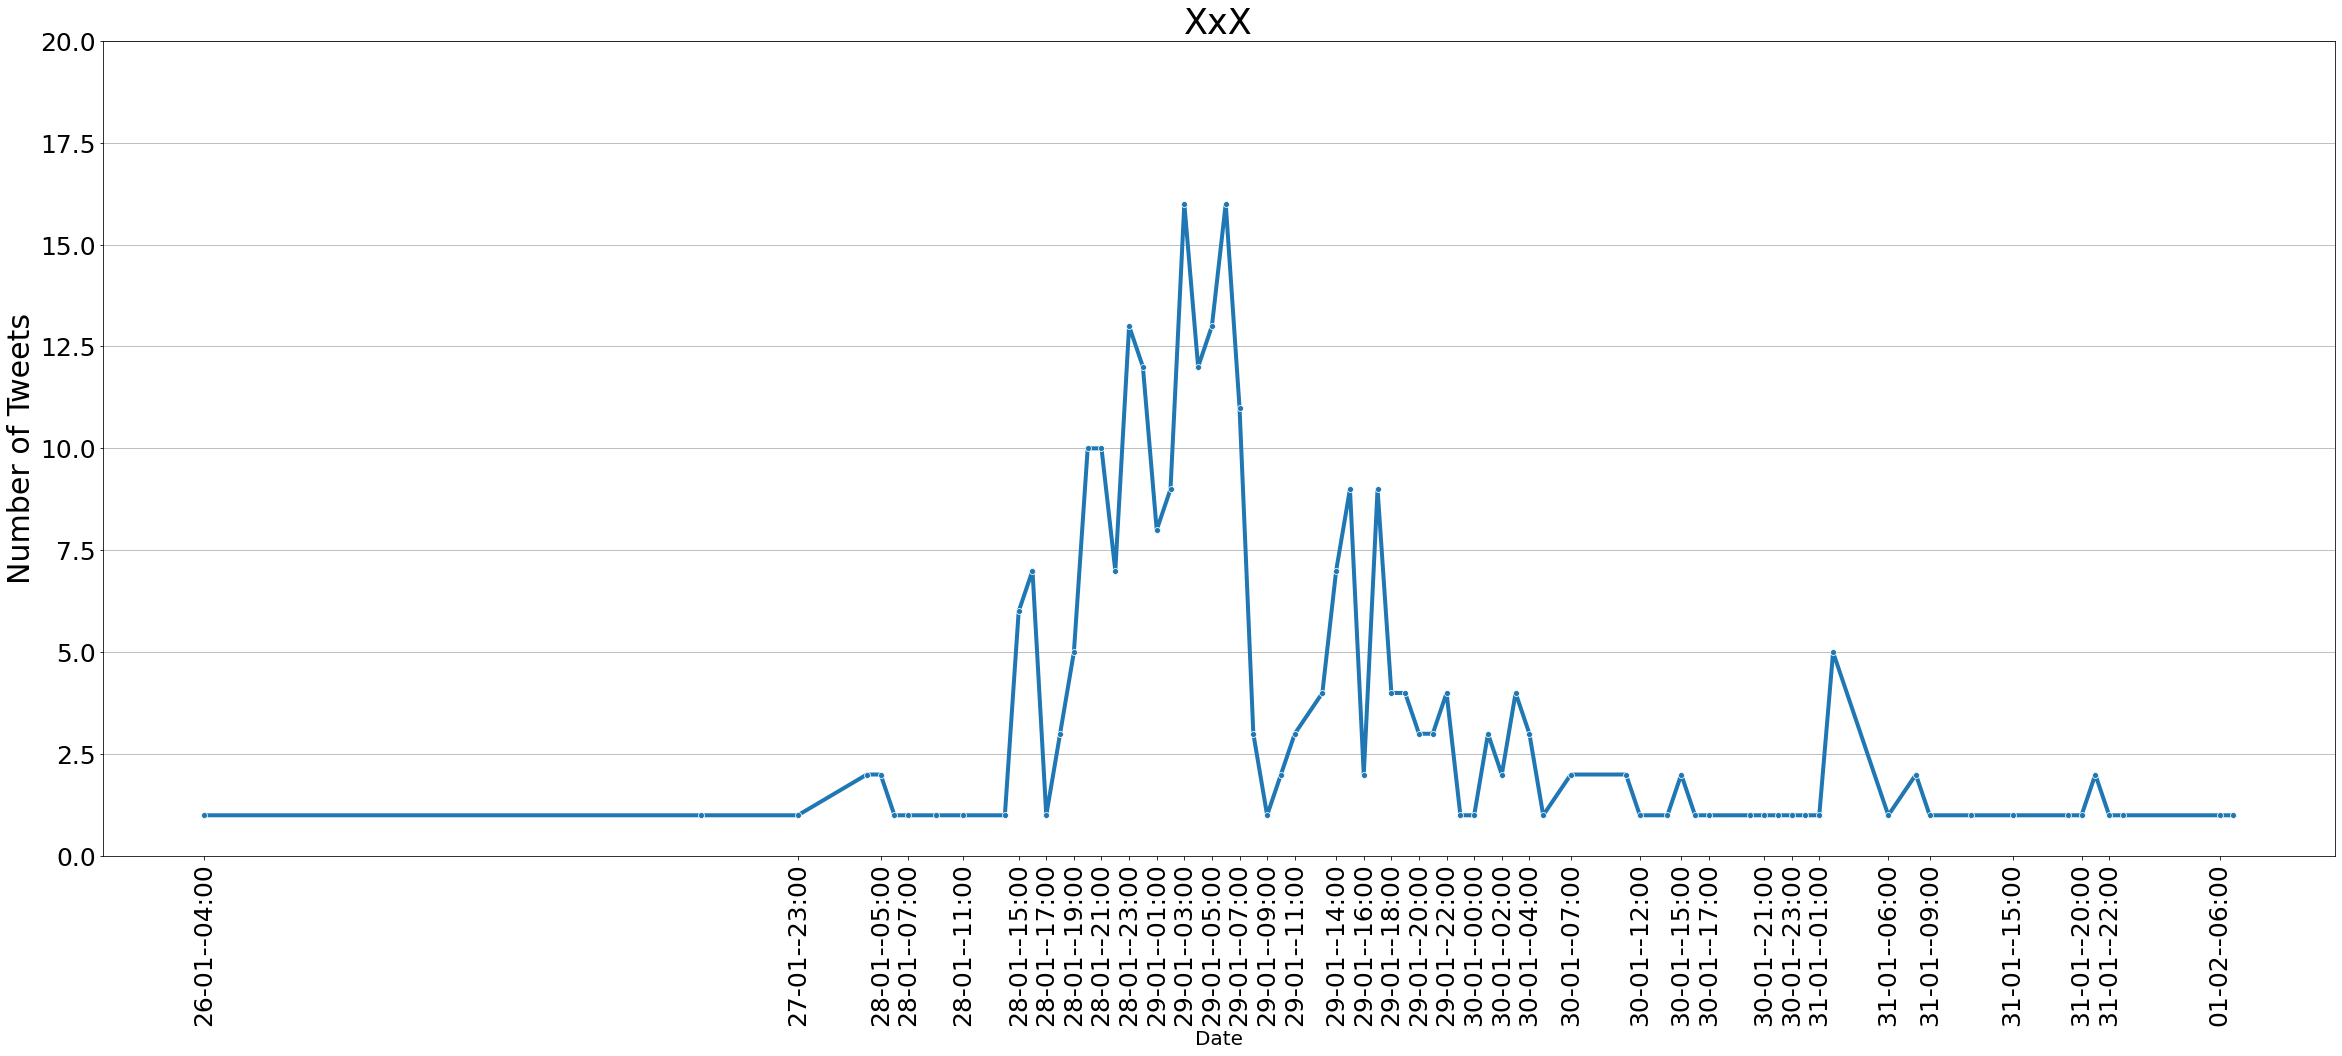

In [161]:

plt.subplots(figsize=(40,15))
plt.xticks(rotation=90)
line = sns.lineplot(data=doge_NY_spec_tweet_group, x=doge_NY_spec_tweet_group.index, y="Time", marker="o", linewidth=4.0)
line.set(xticks=doge_NY_spec_tweet_group.index.values)
plt.xticks(size = 25)
plt.yticks(size = 25)
line.set_xticks(line.get_xticks()[::2])
line.set_ylim([0,20])
plt.xlabel('Date', size = 20)
plt.ylabel('Number of Tweets', size = 30)
plt.grid(axis='y', linestyle='-')
line.xaxis.set_major_formatter(dates.DateFormatter("%d-%m--%H:%M"))